In [1]:
import sys 
import os
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append(os.path.abspath("."))
df = pd.read_csv('./rastert_dem_uni1-clean.txt', sep =" ", header=None)
df_filtrado = df.fillna(0)
#rang_max_colum = float(df_filtrado.shape[1]) ESTO NECESITA MEJORAR. MANUALMENTE SE DEBE ELIMINAR LA ÚLTIMA COLUMNA
df_limpio=df_filtrado.drop(columns=626) #eliminar la última columna  
arr_x = np.linspace(0,625,626) #ESTAMOS USANDO EL VALOR 626 DE FORMA MANUAL 

In [2]:
## línea de visión 
def recta(x_0, y_0, x_1,y_1,x): # todos los puntos son conocidos, la función bota un punto adelante 
    m=(y_1-y_0)/(x_1-x_0)
    y_recta= y_0+m*(x-x_0)     

    return y_recta 

def angle(x_0, y_0, x,y): # todos los puntos son conocidos, la función bota un punto adelante 
    angle = np.arctan((y-y_0)/(x-x_0))*180/np.pi

    return angle

In [3]:
# input 
fila = 123 #fila de observacion
apertura = 3 #en grados
f1=df_limpio.iloc[fila].to_numpy() #fila de análisis 

pA=np.array([210, 115])
pB=np.array([255, 115])
pC=np.array([301, 115])

f_inicio = 380 #punto de inicio para observar 
finicio=[f_inicio, f1[f_inicio]]


626
189.9495
189.9495


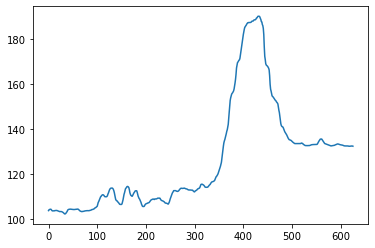

In [4]:
#cima 

f1=df_limpio.iloc[fila].to_numpy() #fila de análisis 
t = 0 
for i in range(len(f1)): 
    if f1[i]> t:        
        t = f1[i]
        cima = t

plt.plot(f1)
print(len(f1))
print(cima)

print(np.max(f1))

626


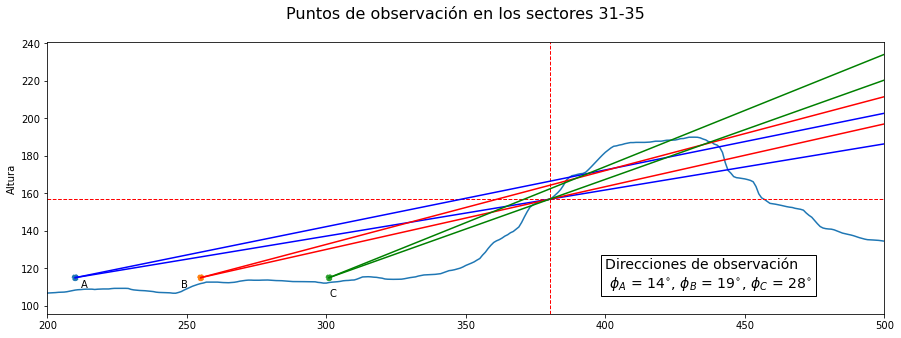

In [5]:

print(len(arr_x ))
fig = plt.figure(figsize=(15,5))
plt.plot(arr_x,f1)
plt.xlim(200, 500)

#Puntos de observación
pA=np.array([210, 115])
pB=np.array([255, 115])
pC=np.array([301, 115])
plt.scatter(pA[0],pA[1], linestyle='dashed')
plt.scatter(pB[0],pB[1], linestyle='dashed')
plt.scatter(pC[0],pC[1], linestyle='dashed')
plt.text(212,110, 'A')
plt.text(248,110, 'B')
plt.text(301,105, 'C')
plt.axvline(4, color='red', linestyle='--', linewidth="2")
plt.title("Puntos de observación en los sectores 31-35\n", fontsize = '16') 

plt.ylabel("Altura")


#Punto de inicio
plt.axvline(f_inicio, color='red', linestyle='--', linewidth="1")
plt.axhline(f1[f_inicio], color='red', linestyle='--', linewidth="1")

#Ángulos de observación
phiA= angle(pA[0], pA[1], f_inicio, f1[f_inicio])
phiB= angle(pB[0], pB[1], f_inicio, f1[f_inicio])
phiC= angle(pC[0], pC[1], f_inicio, f1[f_inicio])

#Rectas 
x_extrapolacion = np.linspace(pA[0],500,1)
y_extrapolacion = []

for i in range(len(x_extrapolacion)):
    ytemp = np.tan(phiA)*x_extrapolacion[i] + pA[1]  # Extrapolación utilizando la ecuación de la recta
    y_extrapolacion.append(ytemp)
    
###################################### 
#Rectas de referencia 

x_extrapolacion = np.linspace(pA[0],500, 501)
x_extrapolacion_2 = np.linspace(pB[0],500, 501)
x_extrapolacion_3 = np.linspace(pC[0],500, 501) 
 
y_extrapolacion = [] 
y_extrapolacion_1_a = [] 

y_extrapolacion_2 = [] 
y_extrapolacion_2_a = [] 

y_extrapolacion_3 = [] 
y_extrapolacion_3_a = [] 

for i in range(len(x_extrapolacion)):
    ytemp = np.tan(np.radians(phiA))*(x_extrapolacion[i]-x_extrapolacion[0]) + pA[1]  
    ytemp_1_a= np.tan(np.radians(phiA+apertura))*(x_extrapolacion[i]-x_extrapolacion[0]) + pA[1] 
    y_extrapolacion.append(ytemp)   
    y_extrapolacion_1_a.append(ytemp_1_a)   
    
for i in range(len(x_extrapolacion_2)):
    ytemp2 = np.tan(np.radians(phiB))*(x_extrapolacion_2[i]-x_extrapolacion_2[0]) + pB[1] 
    ytemp_2_a= np.tan(np.radians(phiB+apertura))*(x_extrapolacion_2[i]-x_extrapolacion_2[0]) + pA[1]  
    y_extrapolacion_2.append(ytemp2) 
    y_extrapolacion_2_a.append(ytemp_2_a) 
    
for i in range(len(x_extrapolacion_3)):
    ytemp3 = np.tan(np.radians(phiC))*(x_extrapolacion_3[i]-x_extrapolacion_3[0]) + pC[1]  
    ytemp_3_a= np.tan(np.radians(phiC+apertura))*(x_extrapolacion_3[i]-x_extrapolacion_3[0]) + pA[1]  

    y_extrapolacion_3.append(ytemp3)
    y_extrapolacion_3_a.append(ytemp_3_a) 


plt.plot(x_extrapolacion, y_extrapolacion, color='blue')
plt.plot(x_extrapolacion, y_extrapolacion_1_a, color='blue')

plt.plot(x_extrapolacion_2, y_extrapolacion_2, color='red')
plt.plot(x_extrapolacion_2, y_extrapolacion_2_a, color='red')

plt.plot(x_extrapolacion_3, y_extrapolacion_3, color='green')
plt.plot(x_extrapolacion_3, y_extrapolacion_3_a, color='green')

#######################################
# Cuadro con la información
texto = 'Direcciones de observación\n $\phi_{A}$ = '+str(round(phiA))+ '$^{\circ}$, $\phi_{B}$ = '+str(round(phiB))+ '$^{\circ}$, $\phi_{C}$ = '+str(round(phiC))+ '$^{\circ}$'
x_pos = 400
y_pos = 110
plt.text(x_pos, y_pos, texto,fontsize = '14', bbox=dict(facecolor='white', edgecolor='black', linewidth=1))


plt.show()


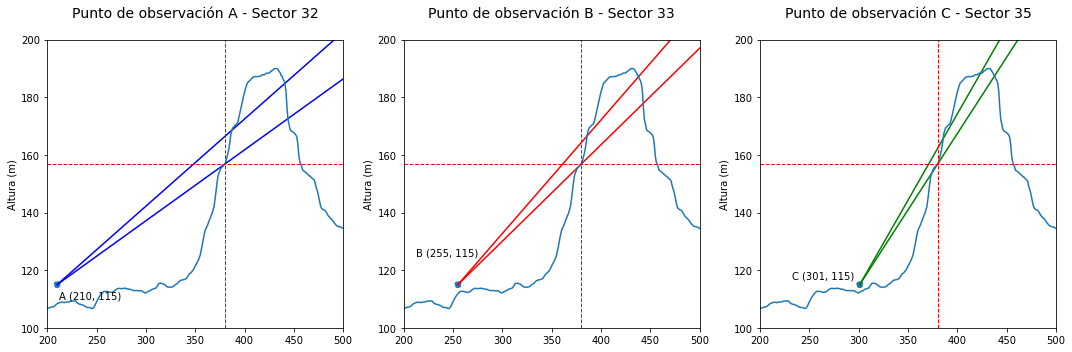

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5)) 

# Graficar en el primer subplot

axs[0].plot(x_extrapolacion, y_extrapolacion, color='blue')
axs[0].plot(x_extrapolacion, y_extrapolacion_1_a, color='blue')
axs[0].plot(arr_x,f1)
axs[0].set_xlim(200, 500)
axs[0].set_ylim(100, 200)
axs[0].axvline(f_inicio, color='red', linestyle='--', linewidth="1")
axs[0].axhline(f1[f_inicio], color='red', linestyle='--', linewidth="1")


texto = 'Posición A: $\phi_{A}$ = '+str(round(phiA))+'$^{\circ}$'
axs[0].set_title(texto)


pA=np.array([210, 115]) 
axs[0].scatter(pA[0],pA[1], linestyle='dashed') 
axs[0].text(212,110, 'A (210, 115)') 
axs[0].axvline(4, color='red', linestyle='--', linewidth="2")
axs[0].set_title("Punto de observación A - Sector 32\n", fontsize = '14') 
axs[0].set_ylabel("Altura (m)")




# Graficar en el segundo subplot
axs[1].plot(x_extrapolacion_2, y_extrapolacion_2, color='red')
axs[1].plot(x_extrapolacion_2, y_extrapolacion_2_a, color='red')
axs[1].plot(arr_x,f1)
axs[1].set_xlim(200, 500)
axs[1].set_ylim(100, 200)
axs[1].axvline(f_inicio, color='red', linestyle='--', linewidth="1")
axs[1].axhline(f1[f_inicio], color='red', linestyle='--', linewidth="1")




texto = 'Posición B: $\phi_{B}$ = '+str(round(phiB))+'$^{\circ}$'
axs[1].set_title(texto)


axs[1].scatter(pB[0],pB[1], linestyle='dashed') 
axs[1].text(212,125, 'B ('+str(pB[0])+', '+str(pB[1])+')') 
axs[1].axvline(4, color='red', linestyle='--', linewidth="2")
axs[1].set_title("Punto de observación B - Sector 33\n", fontsize = '14') 
axs[1].set_ylabel("Altura (m)")

# Graficar en el tercer subplot
axs[2].plot(x_extrapolacion_3, y_extrapolacion_3, color='green')
axs[2].plot(x_extrapolacion_3, y_extrapolacion_3_a, color='green')
axs[2].plot(arr_x,f1)
axs[2].set_xlim(200, 500)
axs[2].set_ylim(100, 200)
axs[2].axvline(f_inicio, color='red', linestyle='--', linewidth="1")
axs[2].axhline(f1[f_inicio], color='red', linestyle='--', linewidth="1")


texto = 'Posición C: $\phi_{C}$ = '+str(round(phiC))+'$^{\circ}$'
axs[2].set_title(texto)


axs[2].scatter(pC[0],pC[1], linestyle='dashed') 
axs[2].text(232,117, 'C ('+str(pC[0])+', '+str(pC[1])+')') 
axs[2].axvline(4, color='red', linestyle='--', linewidth="2")
axs[2].set_title("Punto de observación C - Sector 35\n", fontsize = '14') 
axs[2].set_ylabel("Altura (m)")
 

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura con los subplots
plt.show()



In [7]:

apertura=np.degrees(np.arctan(1/3))


#rango de tamaños a una distancia h de observación 

h = np.sqrt((finicio[0]-pC[0])**2+(finicio[1]-pC[1])**2)

resolucion = h*np.arctan(1/3)
print(resolucion)

#for i in range(len()):

d = finicio[0]-pA[0]
c = finicio[1]-pA[1]
print(d, c)
#pasos 

beta = np.arctan(((c+1)*d)/((d+1)*c)*(c/d))-np.arctan(c/d)

beta1 =np.arctan((c+1)/(d+1))-np.arctan(c/d)


print("beta:",np.degrees(beta))
print("beta1:", np.degrees(beta1))

28.76337706223515
170 41.841800000000006
beta: 0.2379218533771511
beta1: 0.2379218533771511


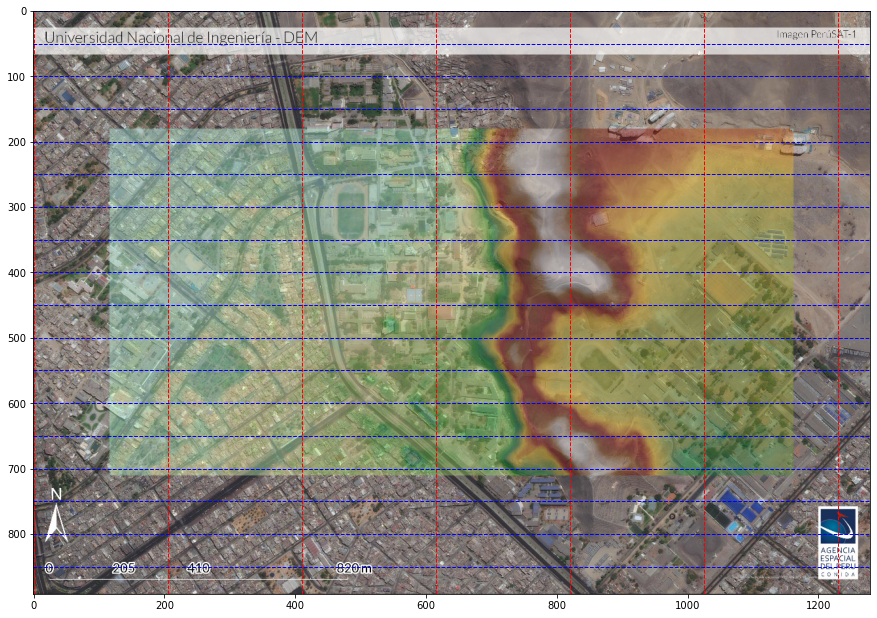

<function matplotlib.pyplot.show(close=None, block=None)>

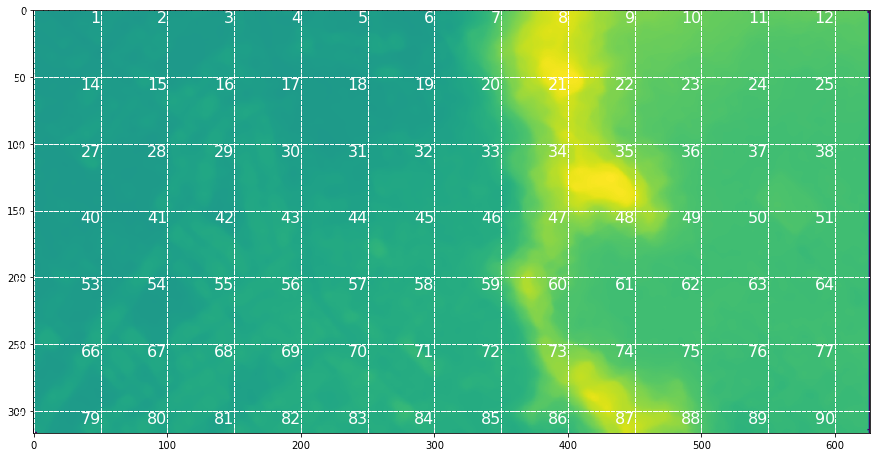

In [8]:
#####################################
## Definición de zonas de observación

imagen = plt.imread('/home/justus/Dropbox/b_research/b-muongraphy-UNI/imagen_campus_uni_raster.jpeg')
plt.figure(figsize=(15,15))
plt.imshow(imagen)
for i in range(0, 1280, 205):     
    plt.axvline(i, color='red', linestyle='--', linewidth="1")        
for j in range(0, 892, 50):
    plt.axhline(j, color='blue', linestyle='--', linewidth="1")
plt.show()

plt.figure(figsize=(15,15))
matriz = np.array([[1, 2,3,4,5,6,7,8,9,10,11,12,13], [14,15,16,17,18,19,20,21,22,23,24,25,26]])
plt.imshow(df_filtrado)
for i in range(0, 626, 50):     
    for j in range(0, 316, 50):
        plt.axvline(i, color='white', linestyle='--', linewidth="1")
        plt.axhline(j, color='white', linestyle='--', linewidth="1")
        
        plt.text(i, j, str((j+i)//50+(12*j//50)), color='white', fontsize = '16', ha='right', va='top')
#plt.colorbar() 
plt.savefig('imagen_campus_uni_raster_zonas_observacion.jpg') 
plt.show

13.827267402267234 18.507166116424475 27.907620132617698
3.122884838449033 0.33473440000000015 -0.3840873341095386


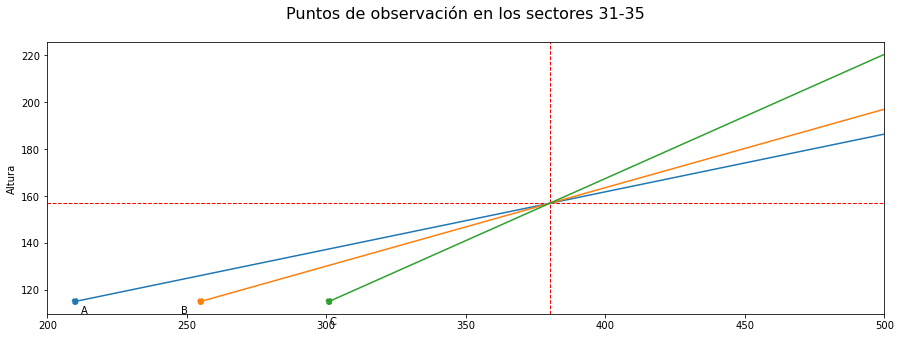

In [9]:
fila = 123 #fila de observacion
f1=df_limpio.iloc[fila].to_numpy()
fig = plt.figure(figsize=(15,5)) 
plt.xlim(200, 500)

#Puntos de observación
pA=np.array([210, 115])
pB=np.array([255, 115])
pC=np.array([301, 115])
plt.scatter(pA[0],pA[1], linestyle='dashed')
plt.scatter(pB[0],pB[1], linestyle='dashed')
plt.scatter(pC[0],pC[1], linestyle='dashed')
plt.text(212,110, 'A')
plt.text(248,110, 'B')
plt.text(301,105, 'C')
plt.axvline(4, color='red', linestyle='--', linewidth="2")
plt.title("Puntos de observación en los sectores 31-35\n", fontsize = '16') 

plt.ylabel("Altura")

f_inicio = 380 #punto de inicio para observar 

#Punto de inicio
plt.axvline(f_inicio, color='red', linestyle='--', linewidth="1")
plt.axhline(f1[f_inicio], color='red', linestyle='--', linewidth="1")
finicio=[f_inicio, f1[f_inicio]]

#Ángulos de observación
phiA= angle(pA[0], pA[1], f_inicio, f1[f_inicio])
phiB= angle(pB[0], pB[1], f_inicio, f1[f_inicio])
phiC= angle(pC[0], pC[1], f_inicio, f1[f_inicio])

print(phiA, phiB, phiC)
print(np.tan(phiA), np.tan(np.radians(phiB)), np.tan(phiC))


#Rectas 
x_extrapolacion = np.linspace(pA[0],500, 501)
x_extrapolacion_2 = np.linspace(pB[0],500, 501)
x_extrapolacion_3 = np.linspace(pC[0],500, 501) 
 
y_extrapolacion = [] 
y_extrapolacion_2 = [] 
y_extrapolacion_3 = [] 

for i in range(len(x_extrapolacion)):
    ytemp = np.tan(np.radians(phiA))*(x_extrapolacion[i]-x_extrapolacion[0]) + pA[1]  # Extrapolación utilizando la ecuación de la recta
 
    y_extrapolacion.append(ytemp)   
    
for i in range(len(x_extrapolacion_2)):
    ytemp2 = np.tan(np.radians(phiB))*(x_extrapolacion_2[i]-x_extrapolacion_2[0]) + pB[1]  # Extrapolación utilizando la ecuación de la recta
    y_extrapolacion_2.append(ytemp2) 
    
for i in range(len(x_extrapolacion_3)):
    ytemp3 = np.tan(np.radians(phiC))*(x_extrapolacion_3[i]-x_extrapolacion_3[0]) + pC[1]  # Extrapolación utilizando la ecuación de la recta
    y_extrapolacion_3.append(ytemp3)  


plt.plot(x_extrapolacion, y_extrapolacion)
plt.plot(x_extrapolacion_2, y_extrapolacion_2)
plt.plot(x_extrapolacion_3, y_extrapolacion_3)
 